# Creating simulated images of the JWST astrometric calibration field in the LMC


In this tutorial we show step by step instructions to simulate images of the JWST LMC astrometric calibration field. The NIRCam images are simulated using the software MIRAGE. The observation is designed in APT. The APT output is used as input of MIRAGE.

This Notebook must be executed from an environment that has the JWST pipeline installed. 

# Setting things up

In [1]:
import numpy as np
import matplotlib
from matplotlib.patches import Polygon as leopolygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from glob import glob
import yaml
from sys import exit
from shapely.geometry import Polygon 
from astropy import wcs
from astropy.io import fits
import sys
from astropy.io import ascii
import shapely.ops as so

We import several packages

In [2]:


#   change parameters here
data = ascii.read('input-level2.txt')
filter = 'f444w'
# ----------------------------------------------


files = np.array(data['file'])
#association = np.array(data['association'])
#print(data.colnames)
print(files)

['jw01069001001_01101_00001_nrca5_level2_cal.fits'
 'jw01069001001_01101_00001_nrcb5_level2_cal.fits'
 'jw01069001001_01103_00001_nrca5_level2_cal.fits'
 'jw01069001001_01103_00001_nrcb5_level2_cal.fits'
 'jw01069001002_0110d_00001_nrca5_level2_cal.fits'
 'jw01069001002_0110d_00001_nrcb5_level2_cal.fits'
 'jw01069001002_0110f_00001_nrca5_level2_cal.fits'
 'jw01069001002_0110f_00001_nrcb5_level2_cal.fits'
 'jw01069001003_0110p_00001_nrca5_level2_cal.fits'
 'jw01069001003_0110p_00001_nrcb5_level2_cal.fits'
 'jw01069001003_0110r_00001_nrca5_level2_cal.fits'
 'jw01069001003_0110r_00001_nrcb5_level2_cal.fits'
 'jw01069001004_01111_00001_nrca5_level2_cal.fits'
 'jw01069001004_01111_00001_nrcb5_level2_cal.fits'
 'jw01069001004_01113_00001_nrca5_level2_cal.fits'
 'jw01069001004_01113_00001_nrcb5_level2_cal.fits'
 'jw01069002001_0111d_00001_nrca5_level2_cal.fits'
 'jw01069002001_0111d_00001_nrcb5_level2_cal.fits'
 'jw01069002001_0111f_00001_nrca5_level2_cal.fits'
 'jw01069002001_0111f_00001_nrc

In [3]:
coord = []
k= 0
for file in files:
	hdulist = fits.open(file)
    # Parse the WCS keywords in the primary HDU
	w = wcs.WCS(hdulist[1].header)
    # Print out the "name" of the WCS, as defined in the FITS header
	#print(w.wcs.name)

    # Three pixel coordinates of interest.
    # Note we've silently assumed a NAXIS=2 image here
	pixcrd = np.array([[0, 0], [2048, 0], [2048, 2048], [0, 2048]], np.float_)
    # Convert pixel coordinates to world coordinates
	world = w.wcs_pix2world(pixcrd, 0)
	coord.append(world)
	#print((world[0] ))
	#k=k+1

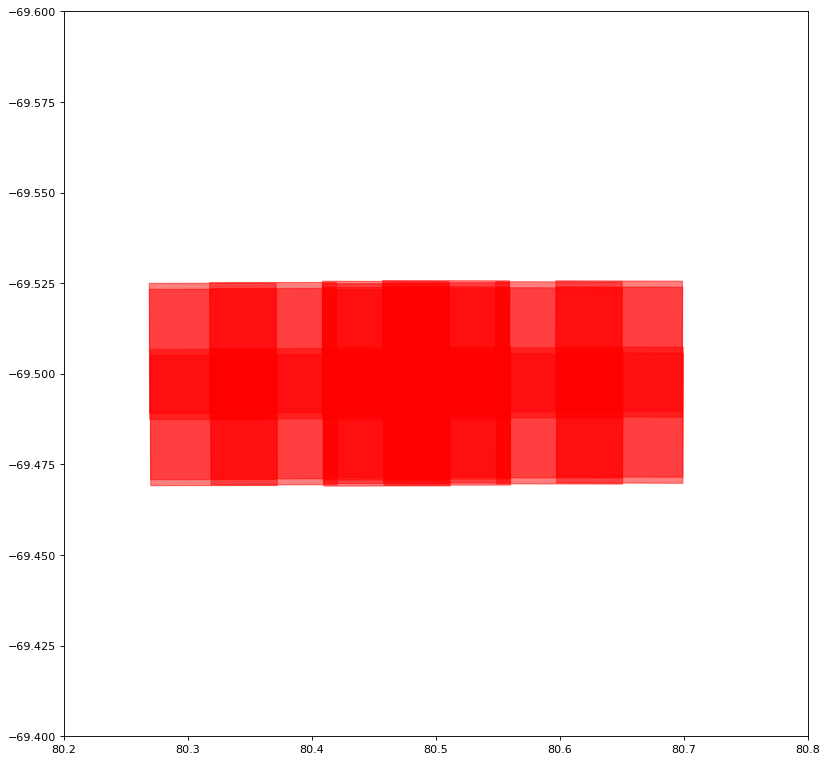

In [4]:
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
for m in range(len(files)):
		rect1 = matplotlib.patches.Polygon(coord[m], edgecolor='red', facecolor = 'red', alpha= 0.5)
		ax.add_patch(rect1)
plt.xlim([80.2, 80.8])
plt.ylim([-69.4, -69.6])
#plt.axis('scaled')
plt.show()



In [5]:
from shapely.geometry import Polygon

# transfomr files to a list
print(files)

files= files.tolist()
# select the first image 
filesout = files[0]
covfile = []
#calculate overlap with other files
referencia = Polygon(coord[0])
# remove the first image from list and its coordinates
files.remove(filesout)
#print(files)
coord.remove(coord[0])

# calculate the union of areas and make new reference
coordnext = np.array([[ 0.0, 0.0],[ 0.0, 0.0],[ 0.0, 0.0],[ 0.0, 0.0] ])

finallist = []
finallist.append(filesout)

['jw01069001001_01101_00001_nrca5_level2_cal.fits'
 'jw01069001001_01101_00001_nrcb5_level2_cal.fits'
 'jw01069001001_01103_00001_nrca5_level2_cal.fits'
 'jw01069001001_01103_00001_nrcb5_level2_cal.fits'
 'jw01069001002_0110d_00001_nrca5_level2_cal.fits'
 'jw01069001002_0110d_00001_nrcb5_level2_cal.fits'
 'jw01069001002_0110f_00001_nrca5_level2_cal.fits'
 'jw01069001002_0110f_00001_nrcb5_level2_cal.fits'
 'jw01069001003_0110p_00001_nrca5_level2_cal.fits'
 'jw01069001003_0110p_00001_nrcb5_level2_cal.fits'
 'jw01069001003_0110r_00001_nrca5_level2_cal.fits'
 'jw01069001003_0110r_00001_nrcb5_level2_cal.fits'
 'jw01069001004_01111_00001_nrca5_level2_cal.fits'
 'jw01069001004_01111_00001_nrcb5_level2_cal.fits'
 'jw01069001004_01113_00001_nrca5_level2_cal.fits'
 'jw01069001004_01113_00001_nrcb5_level2_cal.fits'
 'jw01069002001_0111d_00001_nrca5_level2_cal.fits'
 'jw01069002001_0111d_00001_nrcb5_level2_cal.fits'
 'jw01069002001_0111f_00001_nrca5_level2_cal.fits'
 'jw01069002001_0111f_00001_nrc

['jw01069001001_01101_00001_nrcb5_level2_cal.fits', 'jw01069001001_01103_00001_nrca5_level2_cal.fits', 'jw01069001001_01103_00001_nrcb5_level2_cal.fits', 'jw01069001002_0110d_00001_nrca5_level2_cal.fits', 'jw01069001002_0110d_00001_nrcb5_level2_cal.fits', 'jw01069001002_0110f_00001_nrca5_level2_cal.fits', 'jw01069001002_0110f_00001_nrcb5_level2_cal.fits', 'jw01069001003_0110p_00001_nrca5_level2_cal.fits', 'jw01069001003_0110p_00001_nrcb5_level2_cal.fits', 'jw01069001003_0110r_00001_nrca5_level2_cal.fits', 'jw01069001003_0110r_00001_nrcb5_level2_cal.fits', 'jw01069001004_01111_00001_nrca5_level2_cal.fits', 'jw01069001004_01111_00001_nrcb5_level2_cal.fits', 'jw01069001004_01113_00001_nrca5_level2_cal.fits', 'jw01069001004_01113_00001_nrcb5_level2_cal.fits', 'jw01069002001_0111d_00001_nrca5_level2_cal.fits', 'jw01069002001_0111d_00001_nrcb5_level2_cal.fits', 'jw01069002001_0111f_00001_nrca5_level2_cal.fits', 'jw01069002001_0111f_00001_nrcb5_level2_cal.fits', 'jw01069002002_0111p_00001_nrc

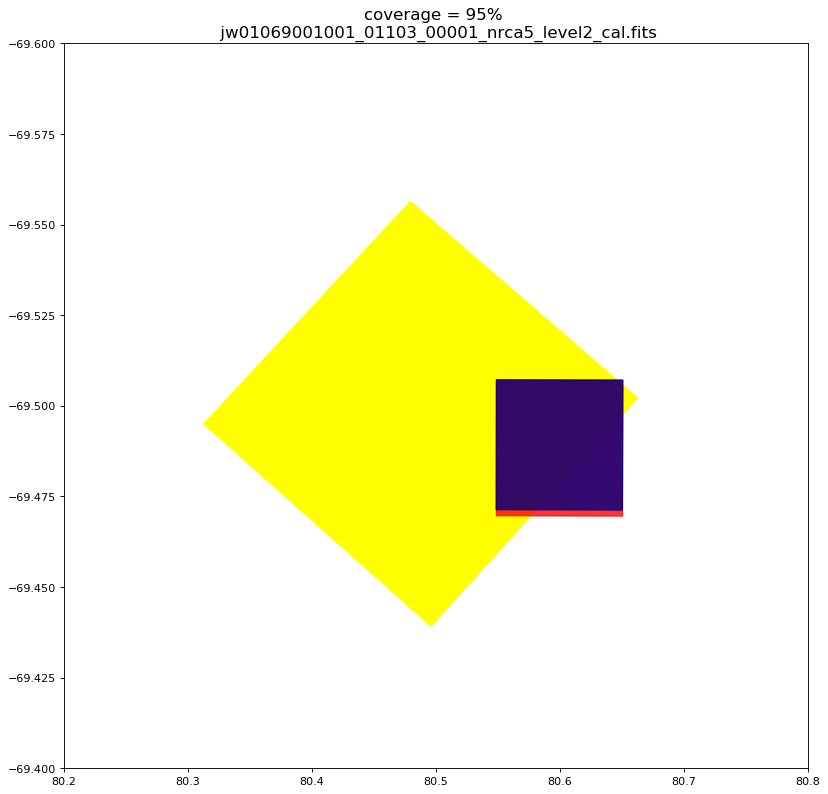

[0, 0, 54, 0, 49, 0, 28, 6, 26, 5, 52, 11, 52, 11, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 11, 0, 11, 0]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
removing  jw01069001002_0110d_00001_nrca5_level2_cal.fits


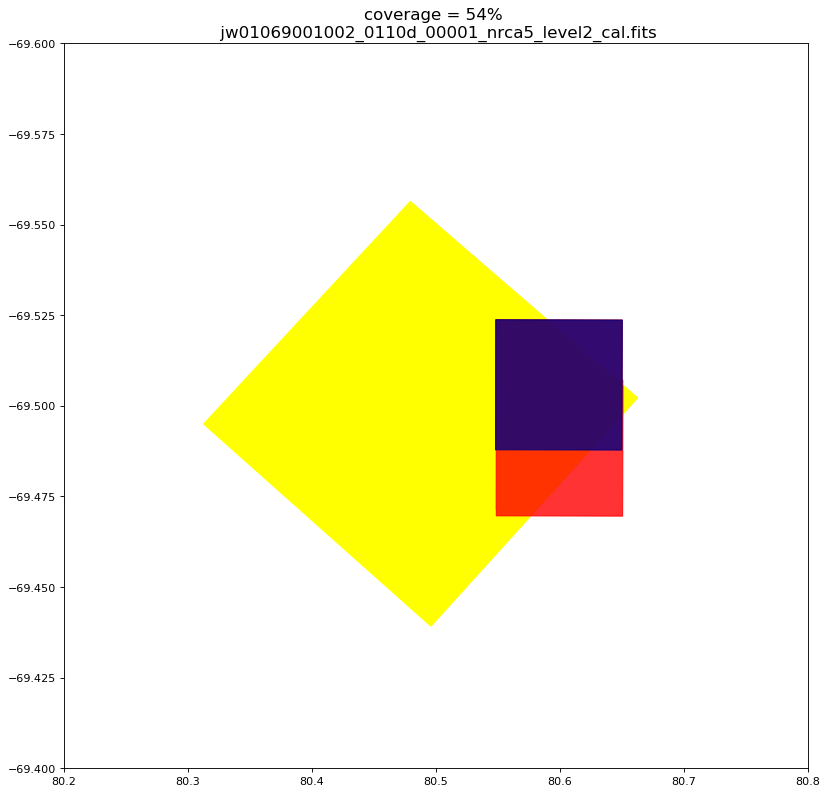

[0, 0, 0, 95, 0, 52, 11, 50, 11, 52, 12, 52, 11, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 10, 0, 11, 0, 11, 0]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
removing  jw01069001002_0110f_00001_nrca5_level2_cal.fits


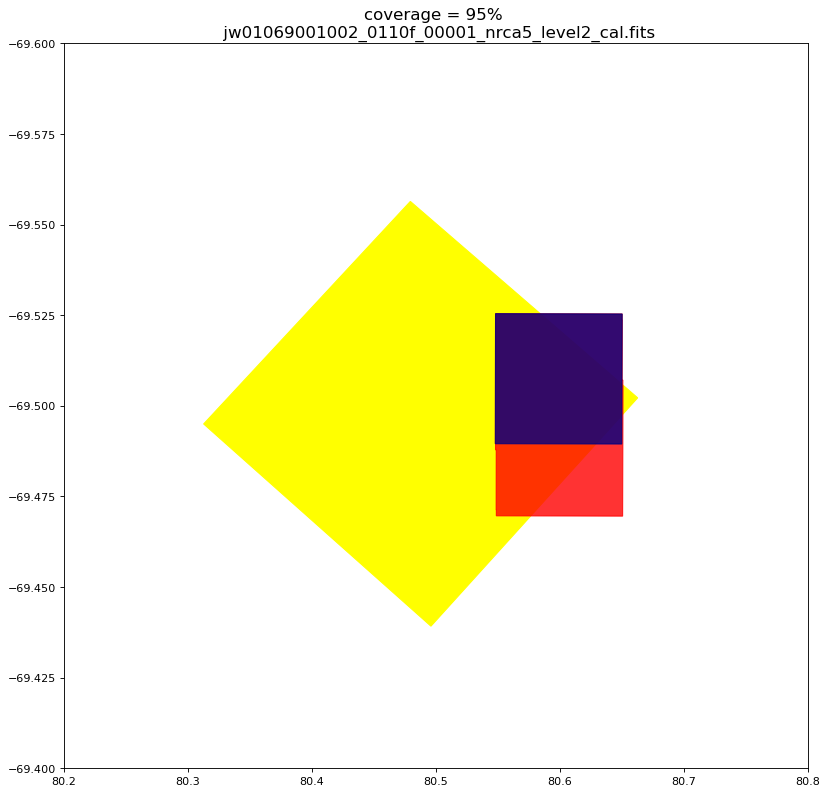

[0, 0, 0, 0, 53, 11, 52, 11, 52, 12, 52, 12, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 11, 0, 11, 0, 11, 0]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
removing  jw01069001003_0110p_00001_nrca5_level2_cal.fits


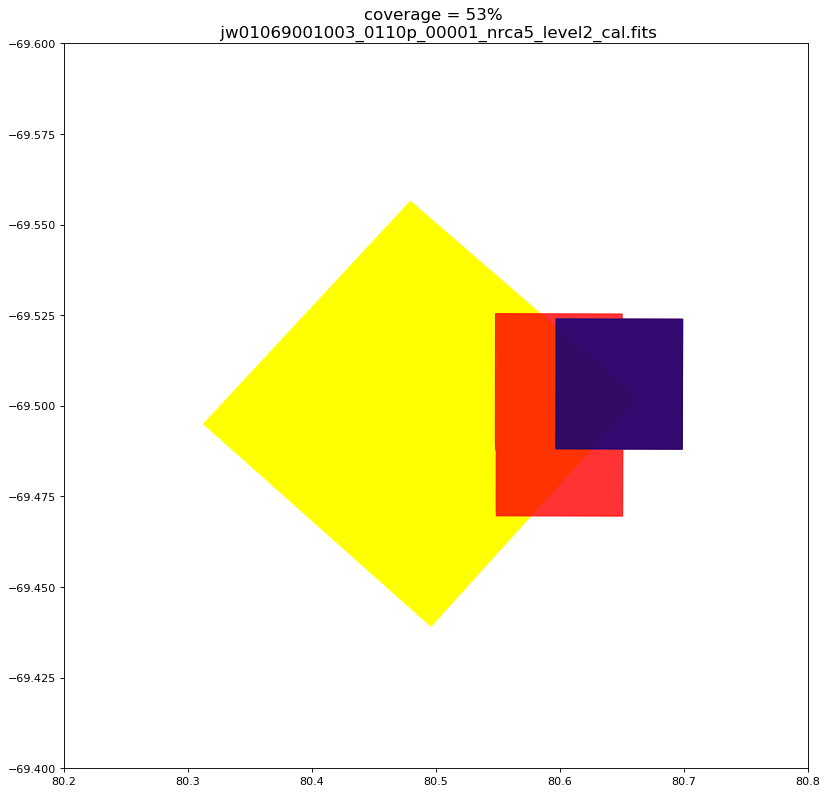

[0, 0, 0, 0, 11, 97, 11, 75, 12, 78, 12, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 11, 0, 11, 0, 11, 0]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
removing  jw01069001003_0110r_00001_nrca5_level2_cal.fits


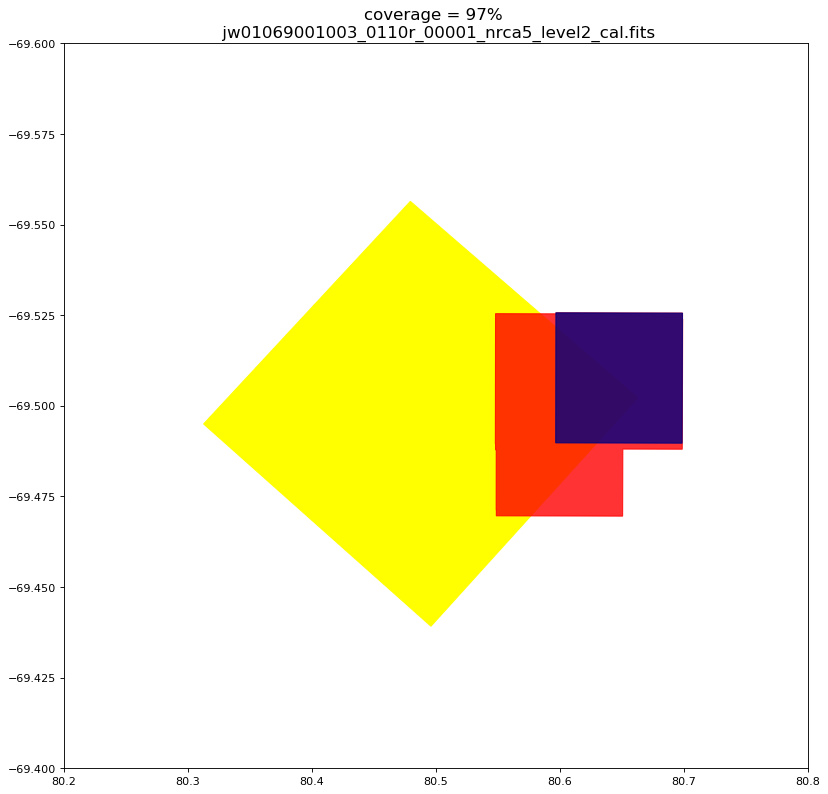

[0, 0, 0, 0, 11, 11, 75, 12, 78, 12, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 11, 0, 11, 0, 11, 0]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
removing  jw01069001004_01113_00001_nrca5_level2_cal.fits


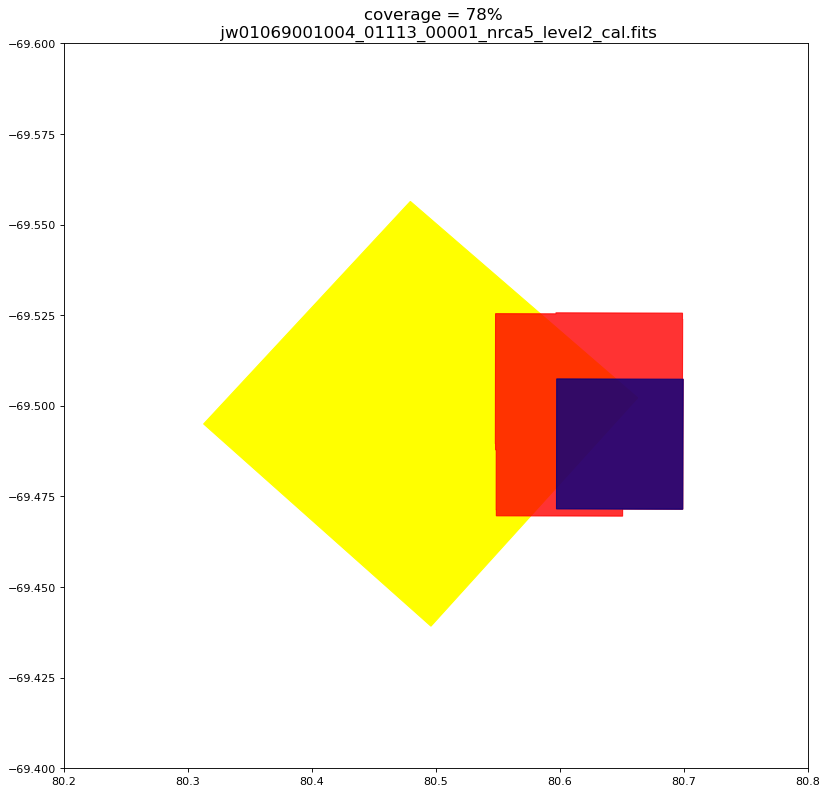

[0, 0, 0, 0, 11, 11, 98, 12, 12, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 11, 0, 11, 0, 11, 0]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
removing  jw01069001004_01111_00001_nrca5_level2_cal.fits


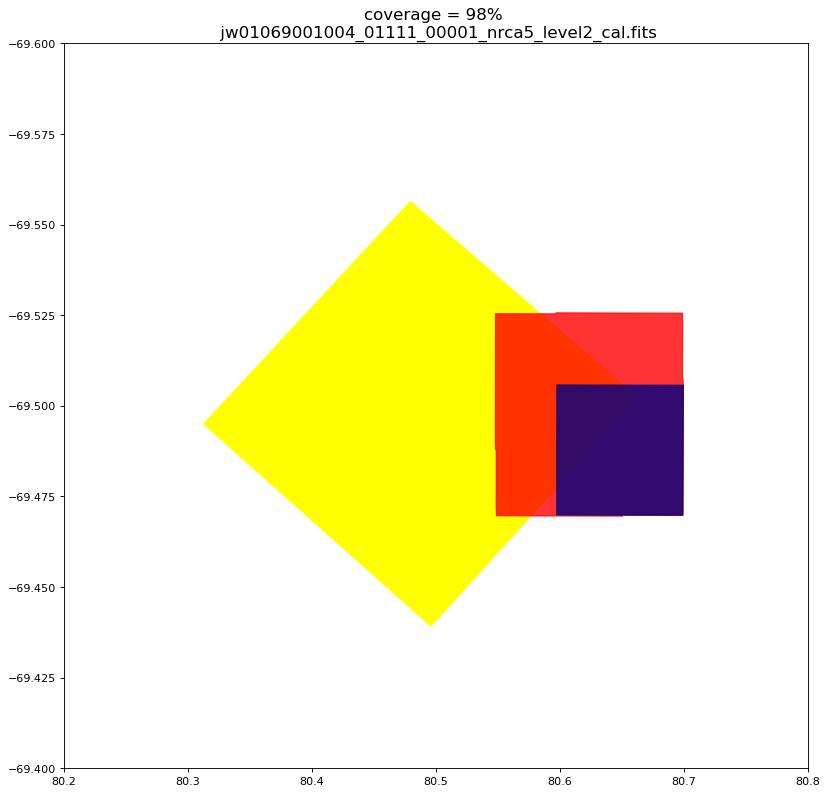

[0, 0, 0, 0, 11, 11, 12, 12, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 11, 0, 11, 0, 11, 0]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069001004_01113_00001_nrcb5_level2_cal.fits


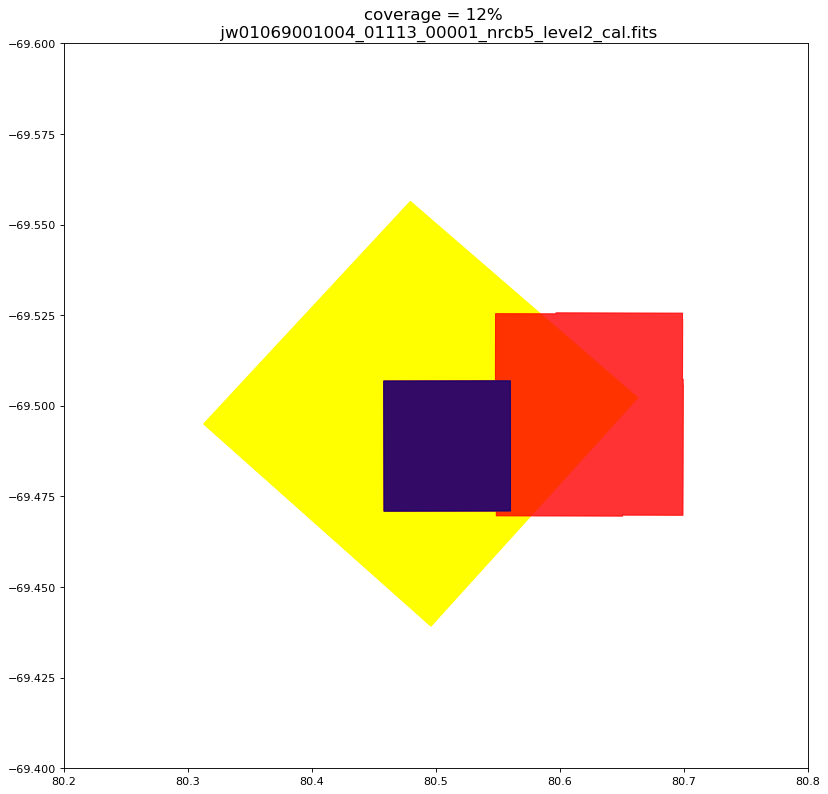

[50, 52, 28, 26, 59, 55, 96, 50, 0, 51, 0, 27, 0, 25, 0, 57, 0, 53, 0, 97, 0, 98, 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
removing  jw01069002004_0112f_00001_nrca5_level2_cal.fits


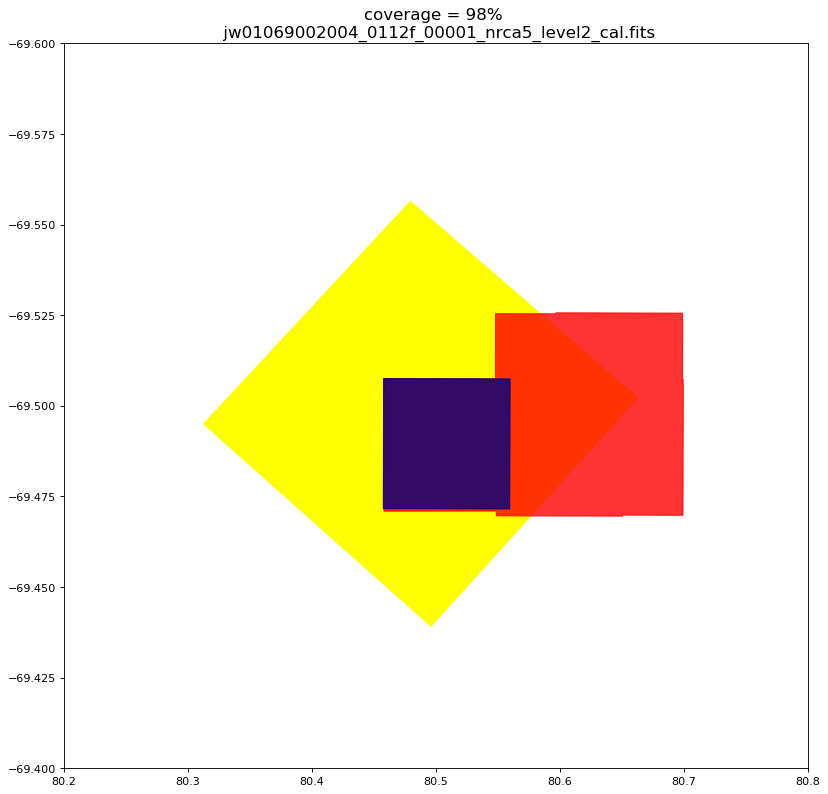

[50, 52, 29, 27, 60, 56, 96, 51, 0, 52, 0, 28, 0, 26, 0, 59, 0, 54, 0, 97, 0, 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
removing  jw01069002004_0112d_00001_nrca5_level2_cal.fits


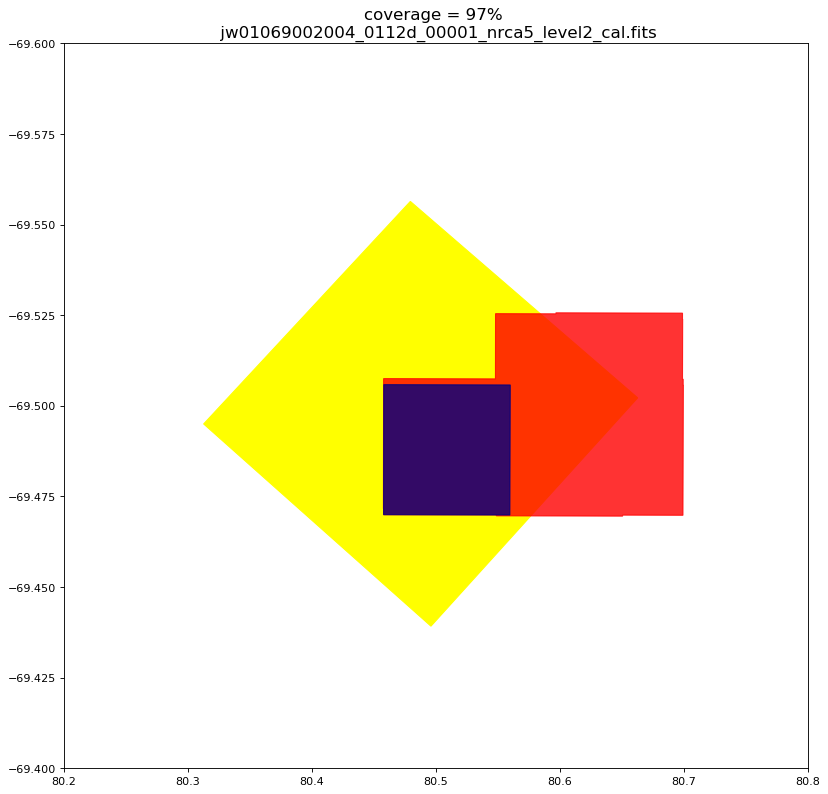

[51, 53, 29, 27, 60, 56, 98, 52, 0, 52, 0, 28, 0, 26, 0, 59, 0, 54, 0, 0, 0]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069001004_01111_00001_nrcb5_level2_cal.fits


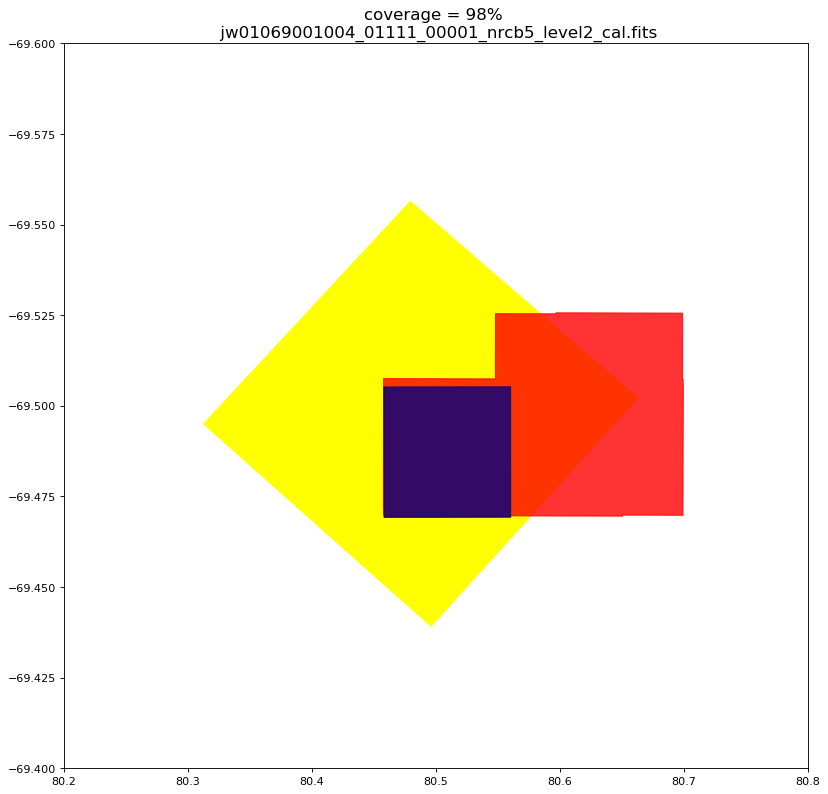

[52, 53, 29, 27, 60, 56, 52, 0, 52, 0, 28, 0, 26, 0, 59, 0, 54, 0, 0, 0]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069001003_0110p_00001_nrcb5_level2_cal.fits


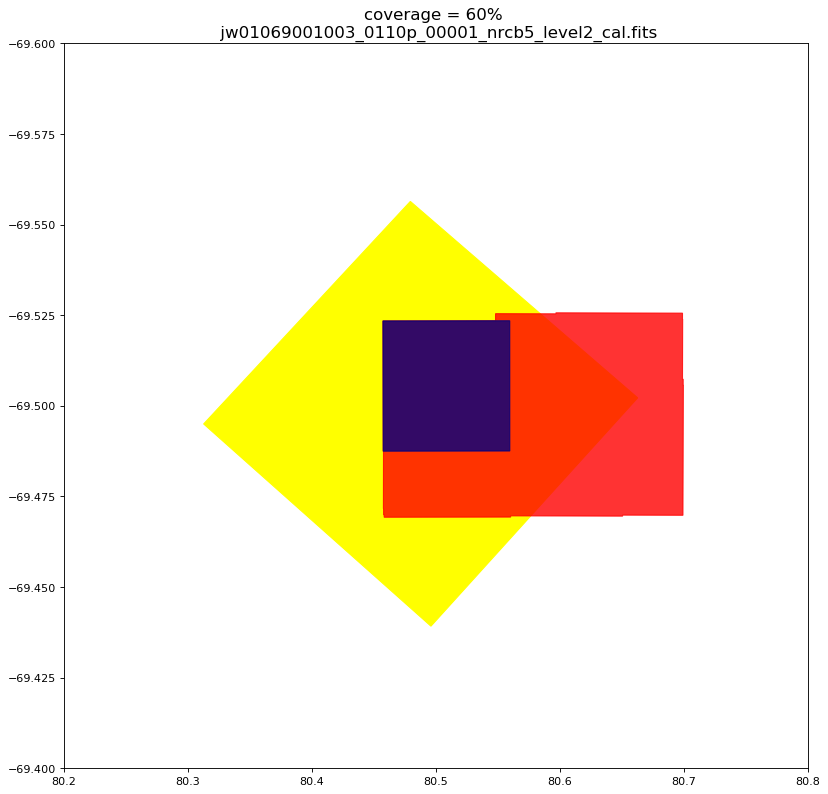

[53, 53, 52, 50, 96, 53, 0, 52, 0, 52, 0, 49, 0, 98, 0, 94, 0, 0, 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
removing  jw01069002003_01121_00001_nrca5_level2_cal.fits


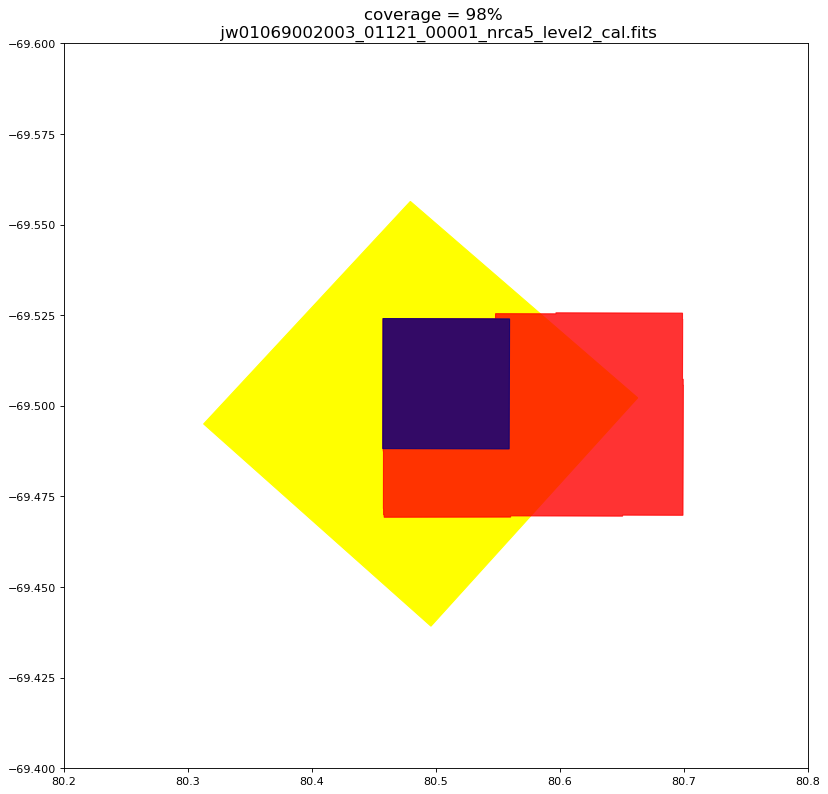

[53, 53, 53, 51, 97, 53, 0, 53, 0, 52, 0, 50, 0, 0, 96, 0, 0, 0]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069001003_0110r_00001_nrcb5_level2_cal.fits


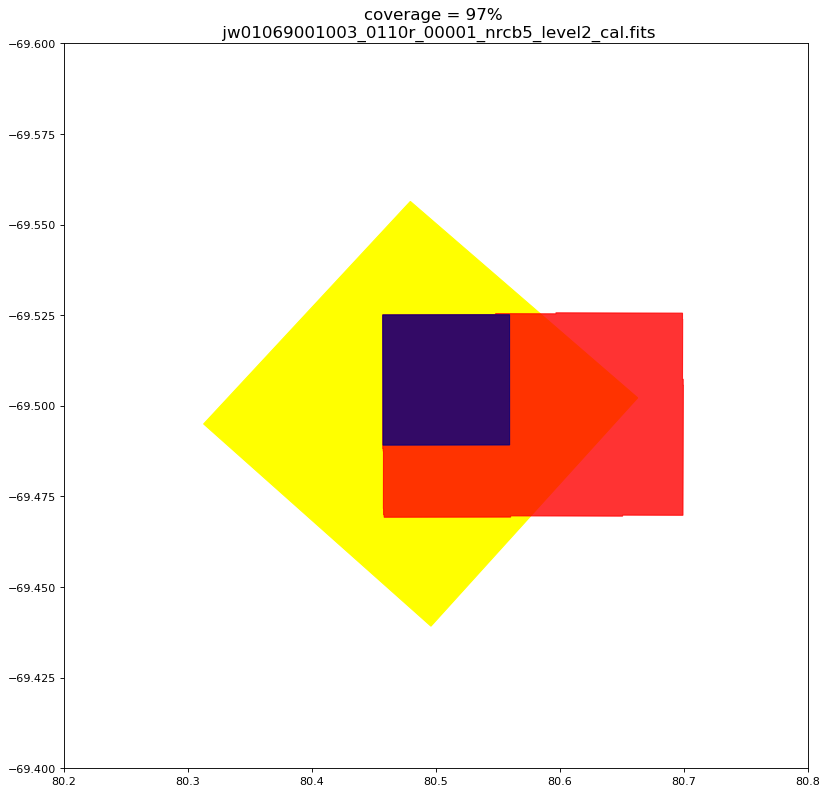

[53, 53, 53, 52, 53, 0, 53, 0, 52, 0, 52, 0, 0, 98, 0, 0, 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
removing  jw01069002003_01123_00001_nrca5_level2_cal.fits


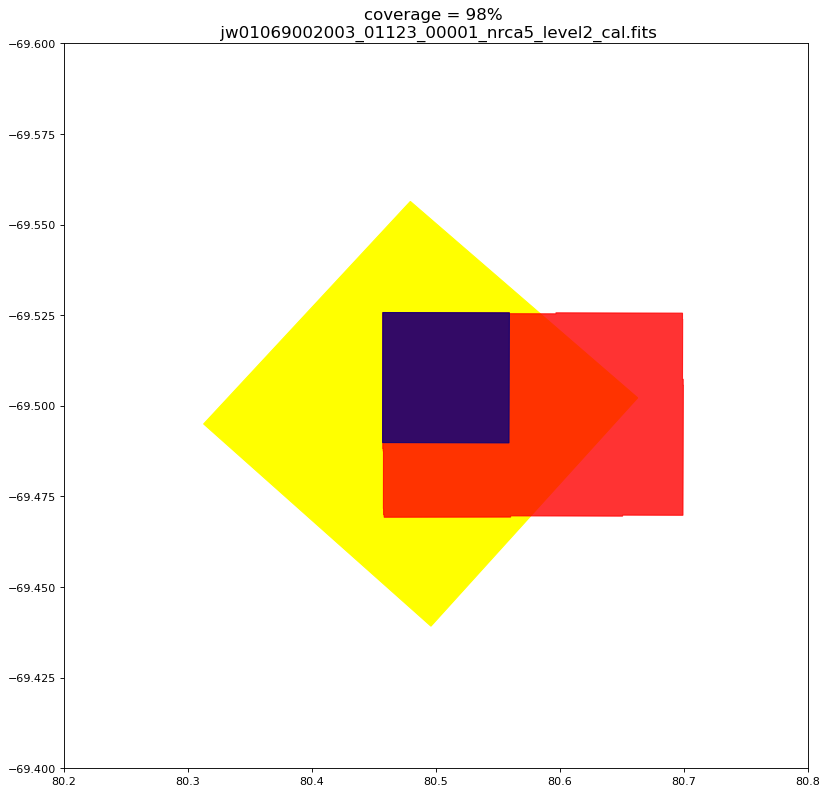

[53, 53, 53, 53, 53, 0, 53, 0, 52, 0, 52, 0, 0, 0, 0, 0]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069002001_0111f_00001_nrca5_level2_cal.fits


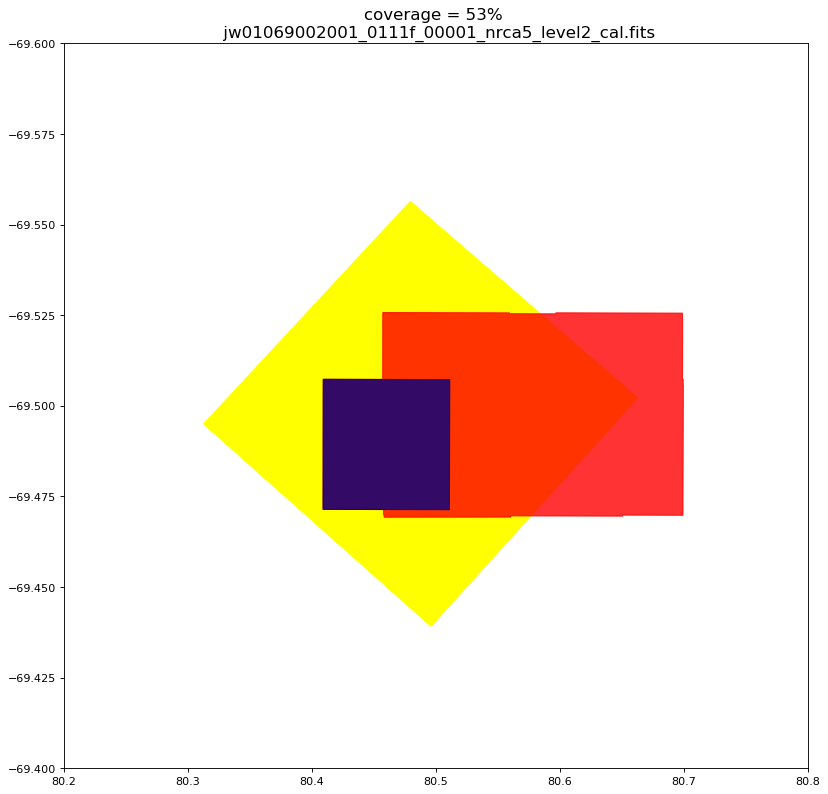

[97, 99, 79, 76, 98, 0, 0, 78, 0, 75, 0, 6, 5, 11, 11]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069001001_01103_00001_nrcb5_level2_cal.fits


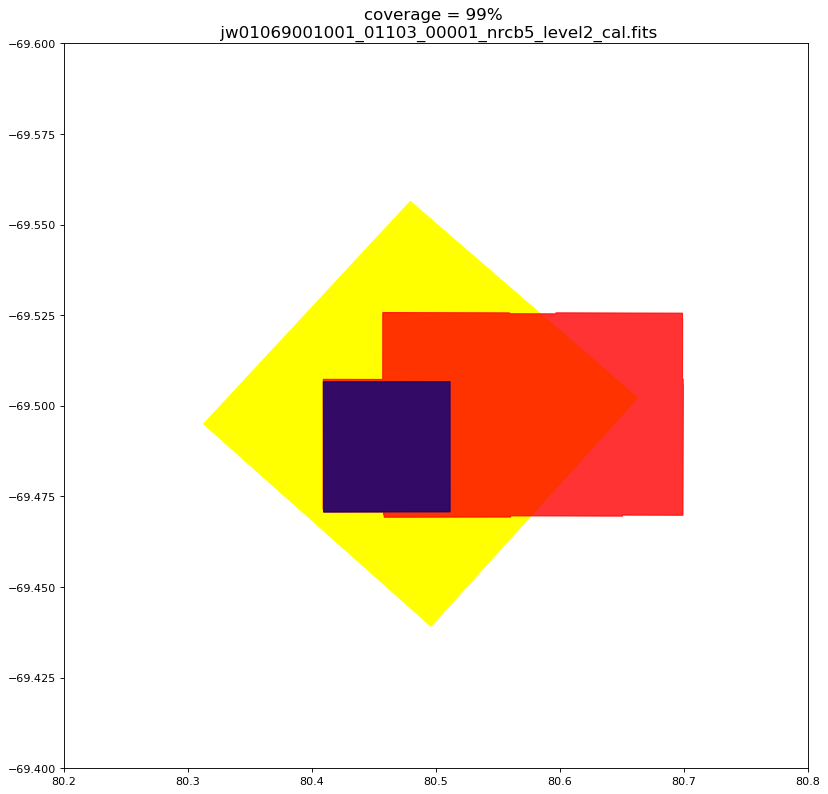

[97, 79, 76, 99, 0, 0, 78, 0, 75, 0, 6, 5, 11, 11]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069002001_0111d_00001_nrca5_level2_cal.fits


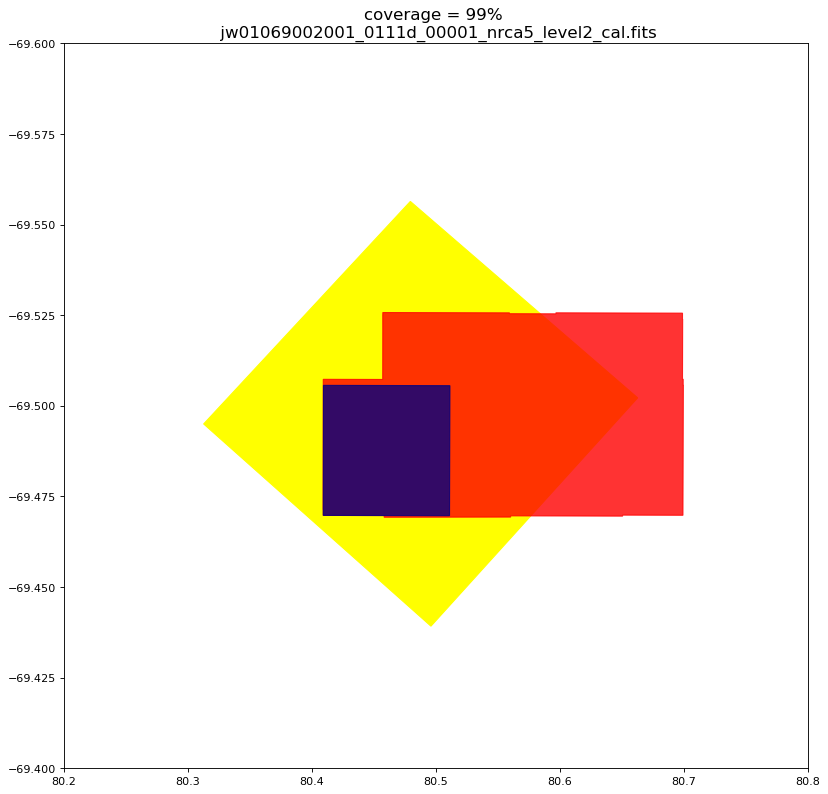

[99, 79, 76, 0, 0, 78, 0, 75, 0, 6, 5, 11, 11]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069001001_01101_00001_nrcb5_level2_cal.fits


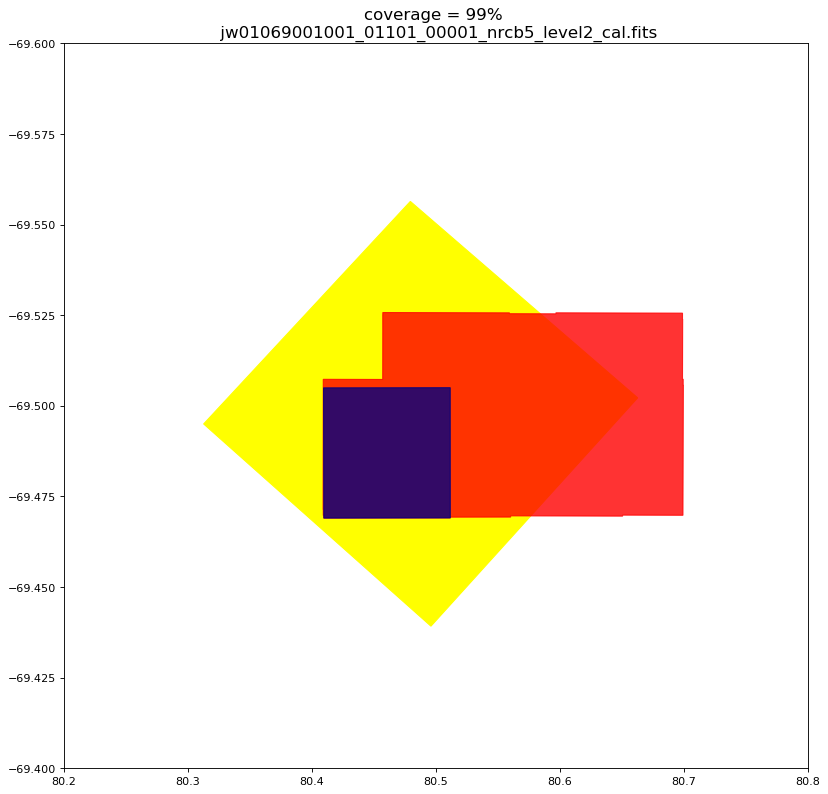

[79, 76, 0, 0, 78, 0, 75, 0, 6, 5, 11, 11]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069001002_0110d_00001_nrcb5_level2_cal.fits


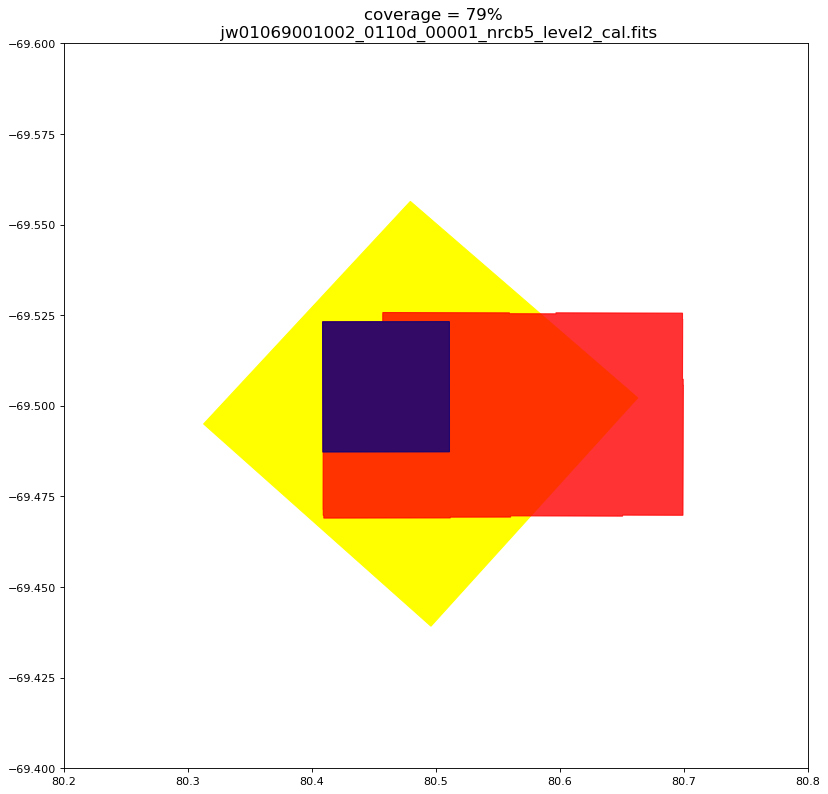

[98, 0, 0, 99, 0, 97, 0, 11, 10, 11, 11]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069002002_0111p_00001_nrca5_level2_cal.fits


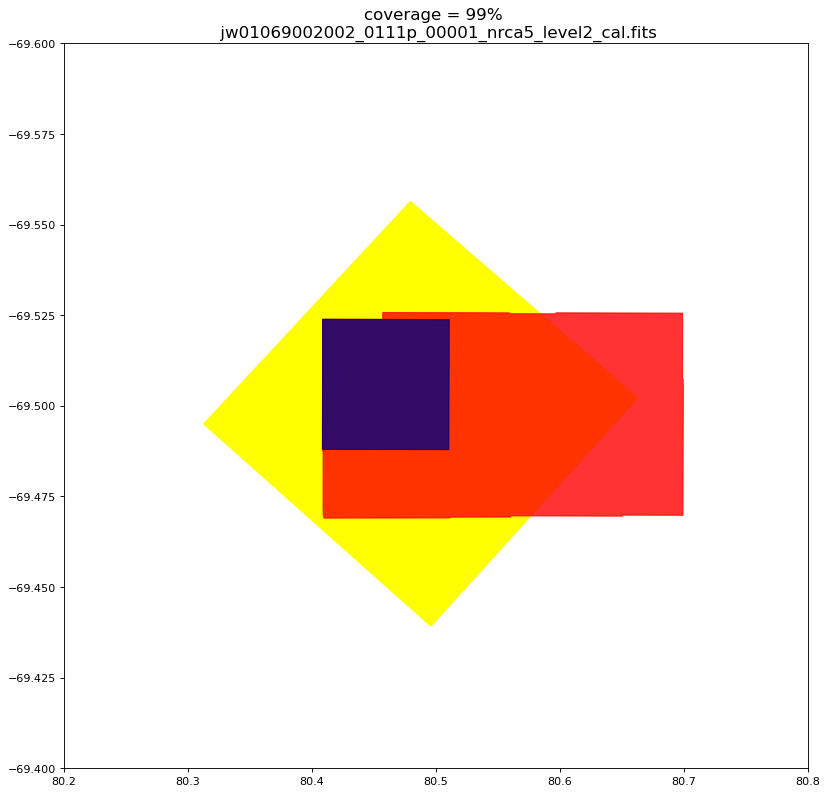

[99, 0, 0, 0, 98, 0, 11, 11, 12, 11]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
removing  jw01069001002_0110f_00001_nrcb5_level2_cal.fits


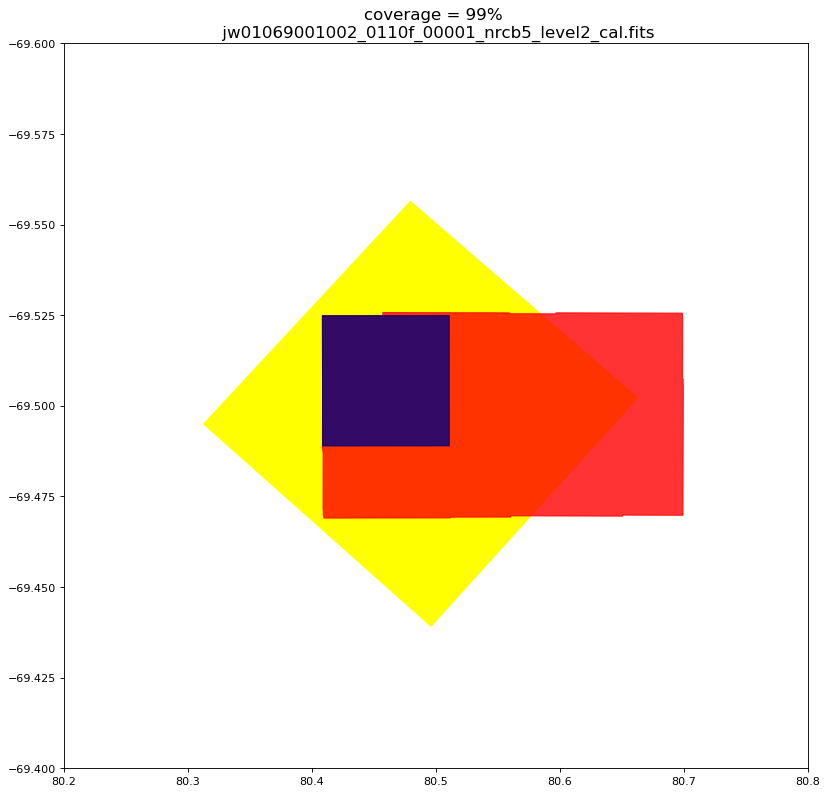

[0, 0, 0, 99, 0, 11, 11, 12, 11]
[0. 0. 0. 1. 0. 0. 0. 0. 0.]
removing  jw01069002002_0111r_00001_nrca5_level2_cal.fits


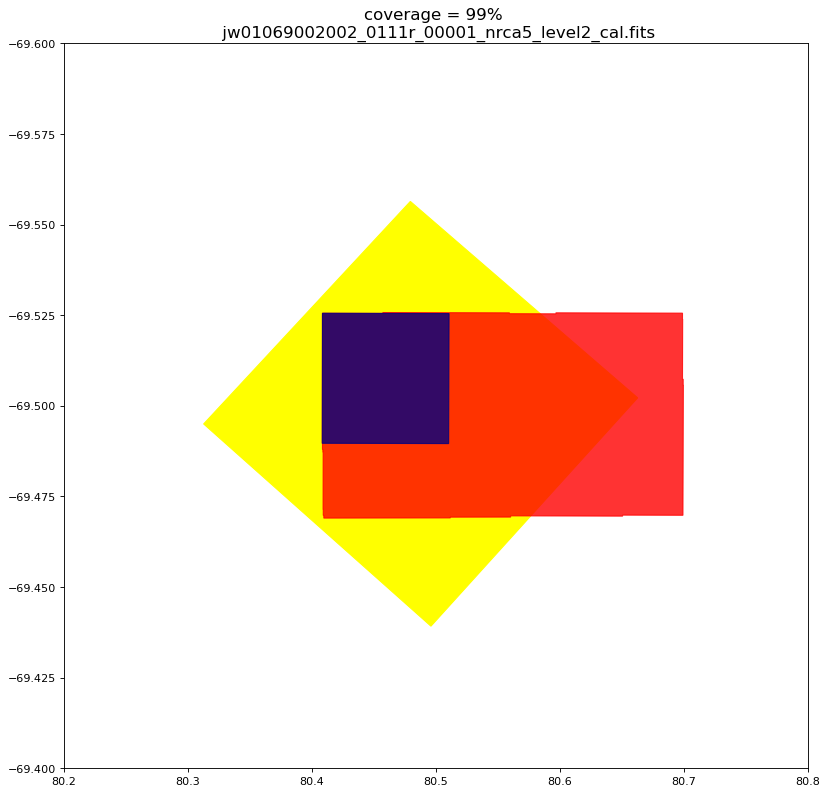

[0, 0, 0, 0, 11, 11, 12, 12]
[0. 0. 0. 0. 0. 0. 0. 1.]
removing  jw01069002004_0112f_00001_nrcb5_level2_cal.fits


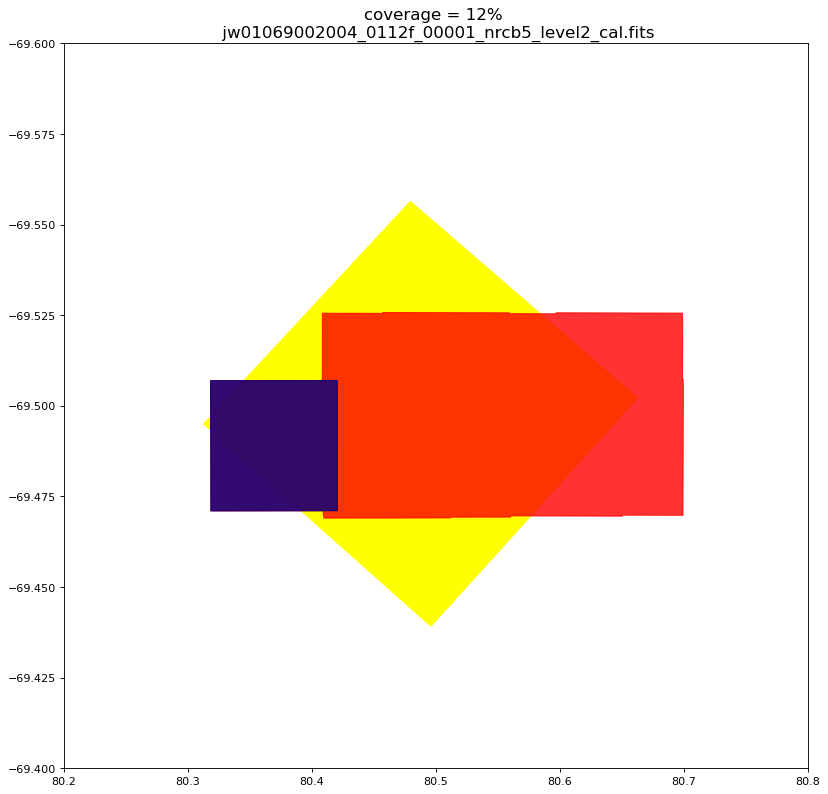

[50, 52, 28, 26, 59, 55, 96]
[0. 0. 0. 0. 0. 0. 1.]
removing  jw01069002004_0112d_00001_nrcb5_level2_cal.fits


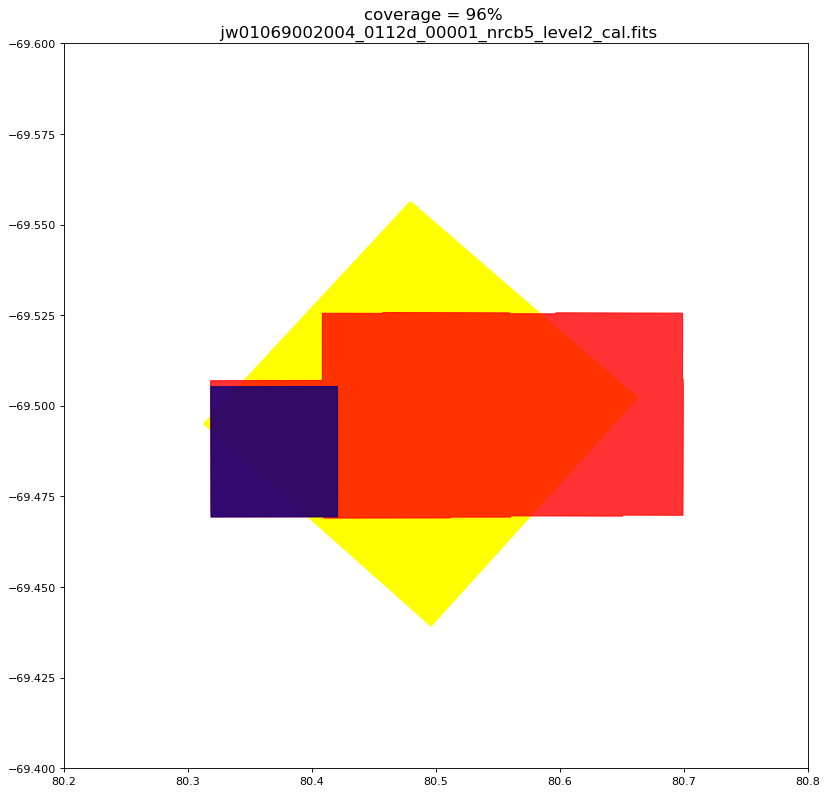

[52, 52, 28, 26, 59, 55]
[0. 0. 0. 0. 1. 0.]
removing  jw01069002003_01121_00001_nrcb5_level2_cal.fits


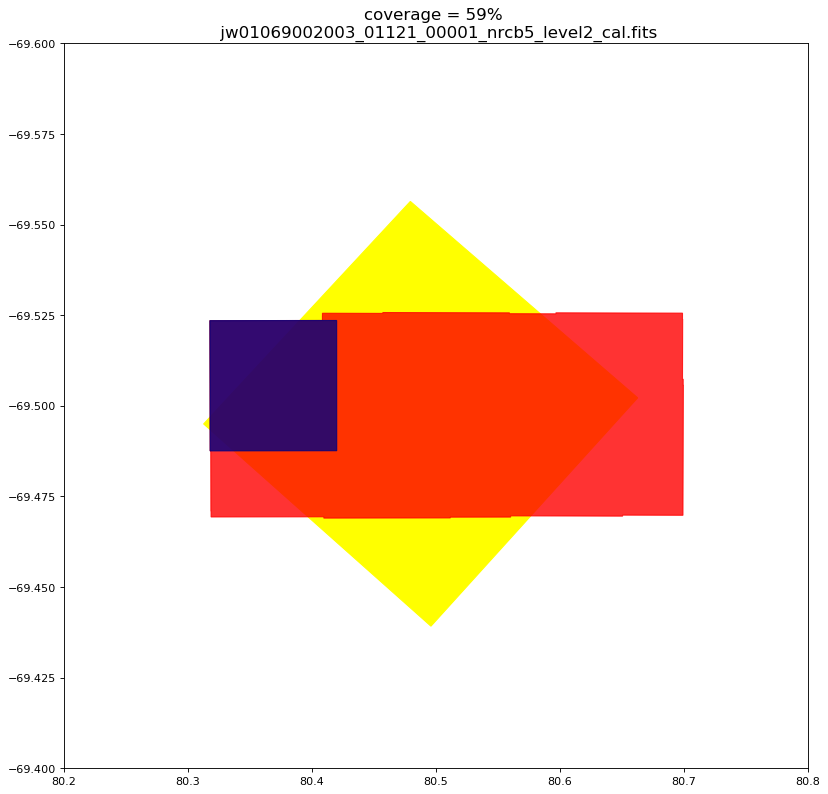

[52, 53, 52, 50, 96]
[0. 0. 0. 0. 1.]
removing  jw01069002003_01123_00001_nrcb5_level2_cal.fits


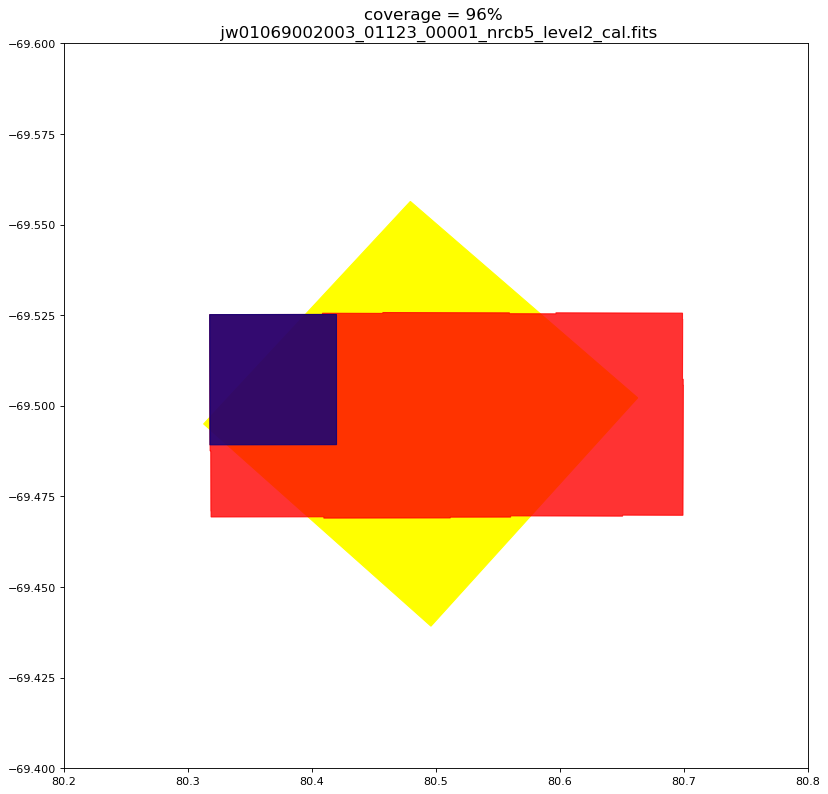

[53, 53, 53, 52]
[0. 0. 1. 0.]
removing  jw01069002002_0111p_00001_nrcb5_level2_cal.fits


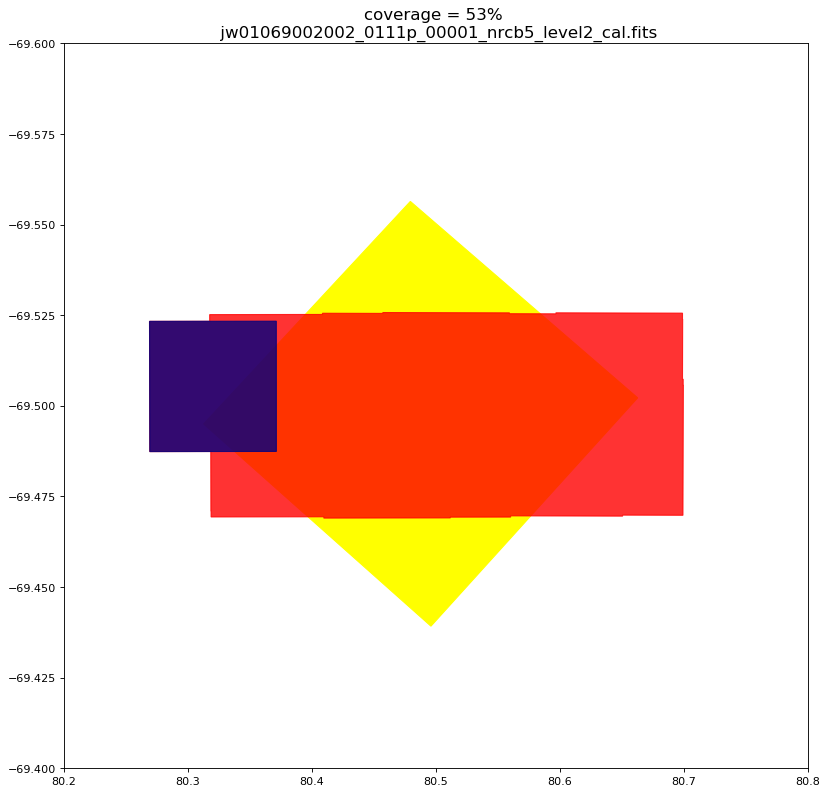

[76, 78, 98]
[0. 0. 1.]
removing  jw01069002002_0111r_00001_nrcb5_level2_cal.fits


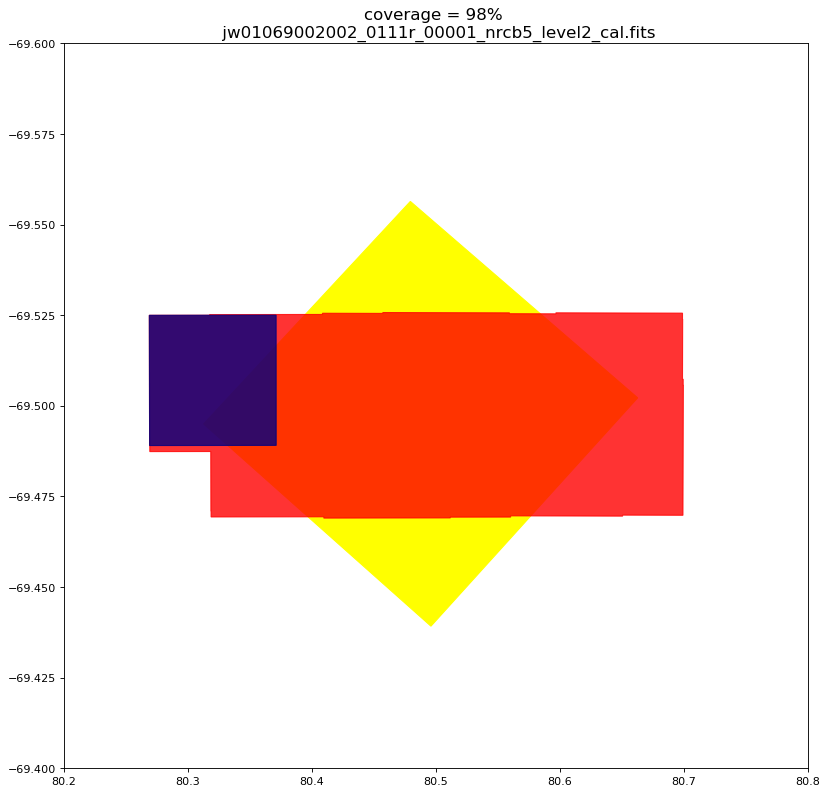

[76, 78]
[0. 1.]
removing  jw01069002001_0111f_00001_nrcb5_level2_cal.fits


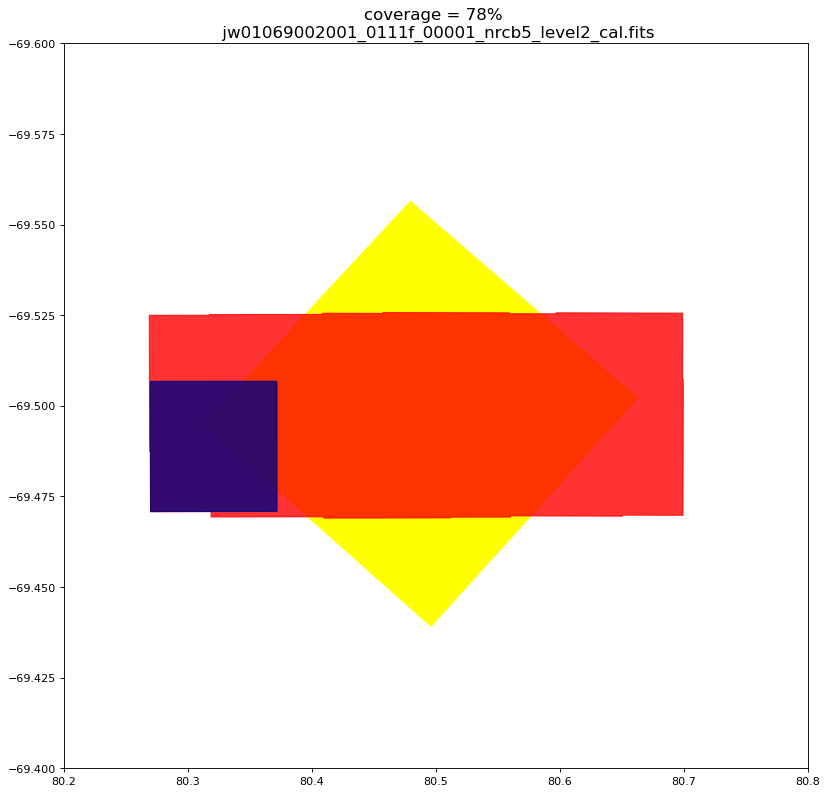

[98]
[1.]
removing  jw01069002001_0111d_00001_nrcb5_level2_cal.fits


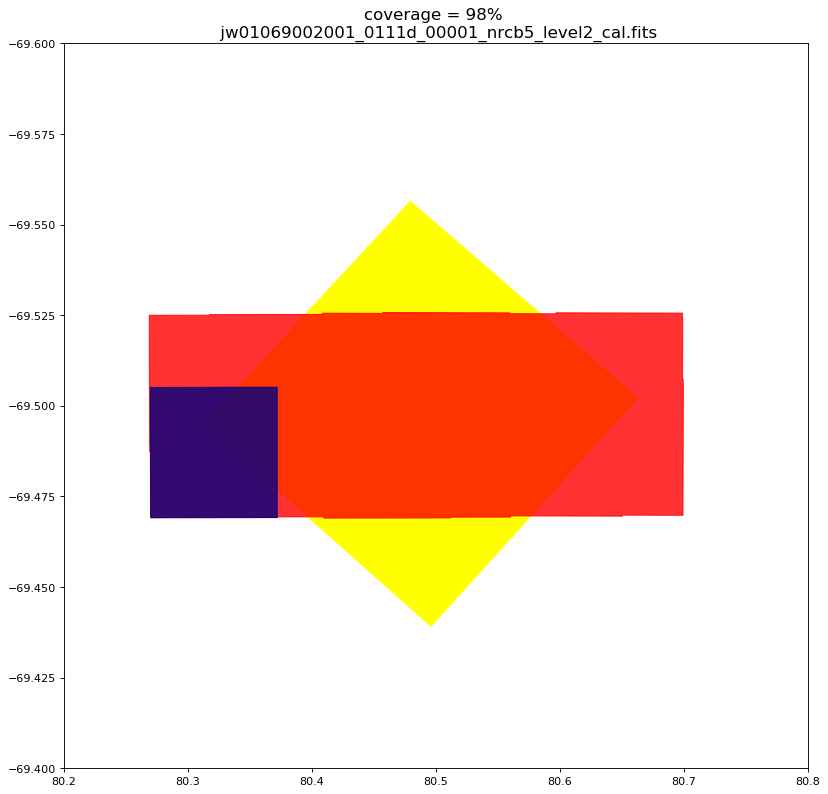

['jw01069001001_01101_00001_nrca5_level2_cal.fits', 'jw01069001001_01103_00001_nrca5_level2_cal.fits', 'jw01069001002_0110d_00001_nrca5_level2_cal.fits', 'jw01069001002_0110f_00001_nrca5_level2_cal.fits', 'jw01069001003_0110p_00001_nrca5_level2_cal.fits', 'jw01069001003_0110r_00001_nrca5_level2_cal.fits', 'jw01069001004_01113_00001_nrca5_level2_cal.fits', 'jw01069001004_01111_00001_nrca5_level2_cal.fits', 'jw01069001004_01113_00001_nrcb5_level2_cal.fits', 'jw01069002004_0112f_00001_nrca5_level2_cal.fits', 'jw01069002004_0112d_00001_nrca5_level2_cal.fits', 'jw01069001004_01111_00001_nrcb5_level2_cal.fits', 'jw01069001003_0110p_00001_nrcb5_level2_cal.fits', 'jw01069002003_01121_00001_nrca5_level2_cal.fits', 'jw01069001003_0110r_00001_nrcb5_level2_cal.fits', 'jw01069002003_01123_00001_nrca5_level2_cal.fits', 'jw01069002001_0111f_00001_nrca5_level2_cal.fits', 'jw01069001001_01103_00001_nrcb5_level2_cal.fits', 'jw01069002001_0111d_00001_nrca5_level2_cal.fits', 'jw01069001001_01101_00001_nrc

In [6]:

print(files)
mcount = 0
for l in range(len(files)):
		covfile = []
		referencia = referencia.union(Polygon(coordnext))
		# calculate the overlap with all the rest of the files
		flag = np.zeros(len(files))
		maxcoverage = 0.0
		for m in range(len(files)):
			detector = Polygon(coord[m])
			coverage = detector.intersection(referencia).area
			covfile.append(round(coverage*100/detector.area))
			#print(round(coverage*100/referencia.area))
			if covfile[m] >= maxcoverage:
				flag = np.zeros(len(files))
				flag[m] = 1
				maxcoverage = covfile[m]
		#select the file with the maximum overlap
		a = np.where(flag == 1.)
		print(covfile)
		# the file with the most coverage is
		filenext = files[max(a[0])]
		coordnext = coord[max(a[0])]

		# calculate the union of area and make new reference
		referencia = referencia.union(Polygon(coordnext))


		# remove the image from list and its coordinates

		coord1 = coord
		files1 = files 
		coord2 = []
		files2 = []
		
	
		for k  in range(len(files)):
			if flag[k] == 0:
				coord2.append(coord1[k])
				files2.append(files1[k])
			else:
				print(flag)
				print('removing  '+ files1[k])
				finallist.append(files1[k])
				#continue
				fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
				ax = fig.add_subplot(111)
				rect1 = leopolygon([(80.3125 , -69.4950 ), (80.4958, -69.4392 ), (80.6625,-69.5022), (80.4792,-69.5564)], color='yellow')
				#rect1 = leopolygon([(14.618 , -72.21462 ), (14.809, -72.2189 ), (14.919,-72.189), (14.925,-72.1331), (14.739,-72.1346), (14.644,-72.1598),(14.618 , -72.21462 )], color='yellow')
				ax.add_patch(rect1)
				#rect1 = referencia #, edgecolor='red', facecolor = 'red', alpha= 0.1)
				#ax.add_patch(rect1)
				rect2 = leopolygon(coord1[k], edgecolor='navy', facecolor = 'navy', alpha= 0.8)
				new_shape = so.cascaded_union(referencia)
				xs, ys = new_shape.exterior.xy
				ax.fill(xs, ys, alpha=0.8, fc='red', ec='red')
				#print(coord1[k])
				#print(referencia)
				ax.add_patch(rect2)
				plt.xlim([80.2, 80.8])
				plt.ylim([-69.4, -69.6])
				plt.title('coverage = '+ str(max(covfile))  + '% \n '+files1[k]  , fontsize=15)
				#plt.axis('scaled')
				pdfname = 'figure_'+str(mcount)
				plt.savefig(pdfname) 
				mcount = mcount + 1
				plt.show()



		coord = coord2
		files = files2

print(finallist)

In [11]:

# here we need to go through the final list and calcuate the overlap 
# with the stellar catalogue and print a list with the file coverage


coord = []
for file in finallist:
	hdulist = fits.open(file)
    # Parse the WCS keywords in the primary HDU
	w = wcs.WCS(hdulist[1].header)
	pixcrd = np.array([[0, 0], [2048, 0], [2048, 2048], [0, 2048]], np.float_)
    # Convert pixel coordinates to world coordinates
	world = w.wcs_pix2world(pixcrd, 0)
	coord.append(world)

covfile = []


for k in range(len(finallist)):
    detector = Polygon(coord[k])
    referencia = Polygon([(80.3125 , -69.4950 ), (80.4958, -69.4392 ), (80.6625, -69.5022), (80.4792, -69.5564)])
    coverage = detector.intersection(referencia).area
    covfile.append(round(coverage*100/detector.area))
    print(covfile) 
print(covfile)


[71]
[71, 75]
[71, 75, 82]
[71, 75, 82, 80]
[71, 75, 82, 80, 36]
[71, 75, 82, 80, 36, 34]
[71, 75, 82, 80, 36, 34, 30]
[71, 75, 82, 80, 36, 34, 30, 28]
[71, 75, 82, 80, 36, 34, 30, 28, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100, 100, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[71, 75, 82, 80, 36, 34, 30, 28, 100, 100, 100, 100, 100, 100,

In [12]:

from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii
data = Table([finallist, covfile], names=['file', 'coverage'])
ascii.write(data, 'values-'+filter+'.txt' )

# here we print a json file with the science files in the correct order
# first we select the ones that have a certain coverage with 
# respect to the catalogue

bestlist = []
for k in range(len(finallist)):
	if covfile[k] >= 99.9:
		bestlist.append(finallist[k])


file = open('association-'+filter+'.json','w' ) 
 
file.write('{ \n') 
file.write('"asn_id": "a3001", \n')
file.write('"asn_pool": "none", \n')
file.write('"asn_rule": "Asn_Image", \n')
file.write('"program": "1069", \n')
file.write('"asn_type": "image3", \n')
file.write('"constraints": "No constraints", \n')
file.write('"code_version": "0.9.4", \n')
file.write('"target": "none", \n')
file.write('"version_id": null, \n')
file.write('"degraded_status": "No known degraded exposures in association.", \n')
file.write('"products": [ { \n')

file.write('"name": "lmc-'+filter+'-test", \n')
file.write('"members": [ \n')

for i in range(len(bestlist)-1):
	file.write('{ \n')
	newline = ' "expname":  "'+ bestlist[i] + '" , \n'
	#file.write('"expname": "jw_level2_cal.fits", \n')
	file.write(newline)
	file.write('"exptype": "science" \n')
	file.write('}, \n')

file.write('{ \n')
newline = ' "expname":  "'+ bestlist[i+1] + '" , \n'
#file.write('"expname": "jw_level2_cal.fits", \n')
file.write(newline)
file.write('"exptype": "science" \n')
file.write('} ] } ] } \n')

 
file.close() 
 
     
   